In [3]:
import keras
from keras import models
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
print(x_train.shape)
print(y_train.shape)
x_train=x_train/255
x_test=x_test/255

(50000, 32, 32, 3)
(50000, 1)


In [11]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [12]:
y_train[2]

array([9], dtype=uint8)

In [6]:
#from keras.applications.vgg16 import VGG16
#from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input

from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
model = Sequential()
model.add(MobileNetV2(input_shape=(32,32,3), alpha=1.0, include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '







9412608/9406464 [==============================] - 1s 0us/step


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1, 1, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               327936    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 2,623,274
Trainable params: 2,589,16

In [ ]:
model.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 106s 2ms/step - loss: 1.2903 - acc: 0.5660 - val_loss: 1.6291 - val_acc: 0.5815
Epoch 2/4
50000/50000 [==============================] - 92s 2ms/step - loss: 0.9775 - acc: 0.6786 - val_loss: 1.1620 - val_acc: 0.6649
Epoch 3/4
50000/50000 [==============================] - 93s 2ms/step - loss: 0.9120 - acc: 0.7016 - val_loss: 1.6539 - val_acc: 0.5954
Epoch 4/4
50000/50000 [==============================] - 93s 2ms/step - loss: 0.9251 - acc: 0.6932 - val_loss: 1.2492 - val_acc: 0.6475


In [ ]:
class_map = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

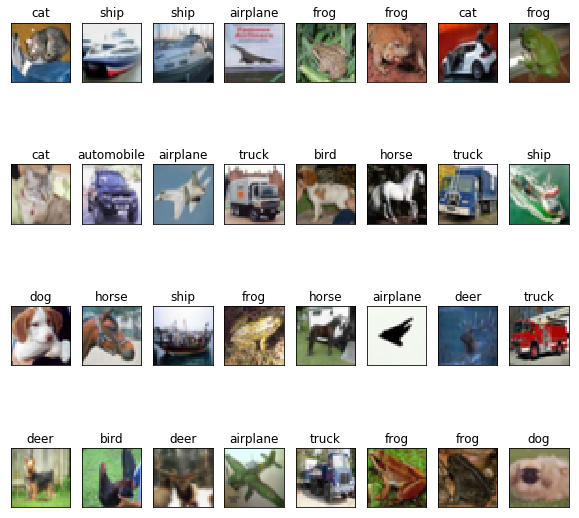

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i, j in enumerate(x_test[:32]):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    title  = model.predict(j.reshape(-1,32,32,3))
    print(title)
    ax.set_title(class_map[np.argmax(title)])
    plt.imshow(j)